In [1]:
import pandas as pd
import re
import numpy as np

In [46]:
lyrics_df1 = pd.read_csv('bob_dylan_discography_allthelyrics.csv', sep='\t', encoding='utf-8')
lyrics_df1 = lyrics_df1[['song','album','lyrics']][lyrics_df1['lyrics'].notna()].reset_index().drop(['index'],axis=1)

len(lyrics_df1)


502

In [49]:
lyrics_df2 = pd.read_csv('queen_discography_allthelyrics.csv', sep='\t', encoding='utf-8')
lyrics_df2 = lyrics_df2[['song','album','lyrics']][lyrics_df2['lyrics'].notna()].reset_index().drop(['index'],axis=1)

len(lyrics_df2)

# queen_discography_allthelyrics.csv
# imagine_dragons_discography_allthelyrics
# lana_del_rey_discography_allthelyrics.csv

196

In [82]:
# lyrics_df = pd.concat([lyrics_df1.sample(200), lyrics_df2])
lyrics_df = lyrics_df2

In [83]:
len(lyrics_df)

196

In [84]:
# limit = 50
limit = len(lyrics_df)
key_list = list(lyrics_df['song'])[:limit]
lyrics_list = list(lyrics_df['lyrics'])[:limit]


In [7]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
# nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
# stopwords

In [9]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [10]:
#

def tokenize_and_stem(text, stopwords=stopwords, lang="engish"):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text, language=lang) for word in nltk.word_tokenize(sent, language=lang) if word.lower() not in stopwords]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text, stopwords=stopwords, lang="engish"):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text, language=lang) for word in nltk.word_tokenize(sent, language=lang) if word.lower() not in stopwords]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens



In [14]:
# from nltk.tokenize import word_tokenize, sent_tokenize

In [11]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [14]:
# import nltk
# nltk.download()

# Then an installation window appears. Go to the 'Models' tab and select 'punkt' from under the 'Identifier' column. 
# Then click Download and it will install the necessary files. Then it should work!

In [39]:
# totalvocab_stemmed = []
# totalvocab_tokenized = []

# for i in program_list:
#     allwords_stemmed = tokenize_and_stem(i, stopwords, "engish")
#     totalvocab_stemmed.extend(allwords_stemmed)
    
#     allwords_tokenized = tokenize_only(i, stopwords, "engish")
#     totalvocab_tokenized.extend(allwords_tokenized)
    
# vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
# print(vocab_frame.shape[0])

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [86]:
# alternative way, with own list of stop words
# https://stackoverflow.com/questions/26826002/adding-words-to-stop-words-list-in-tfidfvectorizer-in-sklearn

tfidf_vectorizer = TfidfVectorizer(
#     max_df=0.8, max_features=900, min_df=0.2, 
#     ngram_range=(1,1), 
#     tokenizer=tokenize_and_stem, 
    stop_words=stopwords
)

tfidf_matrix = tfidf_vectorizer.fit_transform(lyrics_list) # БЕРЕТСЯ ОРИГИНАЛЬНЫЙ ТЕКСТ, БЕЗ stemmed
# idf_values = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
terms = tfidf_vectorizer.get_feature_names_out()

print(tfidf_matrix.shape)

(196, 3242)


In [20]:
from sklearn.cluster import KMeans

In [23]:
from scipy.cluster.vq import kmeans, vq

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

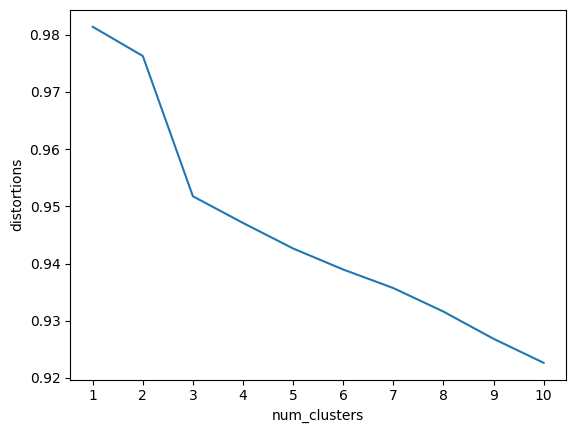

In [87]:
distortions = []
num_clusters_range = range(1, 11)

# Create a list of distortions from the kmeans method
for i in num_clusters_range:
    cluster_centers, distortion = kmeans(tfidf_matrix.todense(), i)
    distortions.append(distortion) 
    
# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters_range,
                           'distortions': distortions})
# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters_range)
plt.show()

In [15]:
# Do this in a separate python interpreter session, since you only have to do it once
import nltk
nltk.download('punkt')

# Do this in your ipython notebook or analysis script
from nltk.tokenize import word_tokenize

sentences = [
    "Mr. Green killed Colonel Mustard in the study with the candlestick. Mr. Green is not a very nice fellow.",
    "Professor Plum has a green plant in his study.",
    "Miss Scarlett watered Professor Plum's green plant while he was away from his office last week."
]

sentences_tokenized = []
for s in sentences:
    sentences_tokenized.append(word_tokenize(s))

[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
sentences_tokenized

[['Mr.',
  'Green',
  'killed',
  'Colonel',
  'Mustard',
  'in',
  'the',
  'study',
  'with',
  'the',
  'candlestick',
  '.',
  'Mr.',
  'Green',
  'is',
  'not',
  'a',
  'very',
  'nice',
  'fellow',
  '.'],
 ['Professor',
  'Plum',
  'has',
  'a',
  'green',
  'plant',
  'in',
  'his',
  'study',
  '.'],
 ['Miss',
  'Scarlett',
  'watered',
  'Professor',
  'Plum',
  "'s",
  'green',
  'plant',
  'while',
  'he',
  'was',
  'away',
  'from',
  'his',
  'office',
  'last',
  'week',
  '.']]